Excercise 20.3.2 Craft a Story from a Dataset
There's a powerpoint presentation summarizing the findings of this analysis in my Github

In [1]:
#Load the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data
dog_df1 = pd.read_csv('C:/Users/Martin Wipf/Springboard/GIT/Storytelling/DogsZurich/20151001hundehalter.csv')
dog_df2 = pd.read_csv('C:/Users/Martin Wipf/Springboard/GIT/Storytelling/DogsZurich/20160307hundehalter.csv')
dog_df3 = pd.read_csv('C:/Users/Martin Wipf/Springboard/GIT/Storytelling/DogsZurich/20170308hundehalter.csv')
dogtype_df = pd.read_csv('C:/Users/Martin Wipf/Springboard/GIT/Storytelling/DogsZurich/zuordnungstabellehunderassehundetyp.csv')

In [3]:
#inspect data
dog_df1.head(1)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,128485,21-30,w,7.0,74.0,Magyar Viszla,NaN,NaN,NaN,I,2014,w,gelb


In [4]:
dog_df2.head(1)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun


In [5]:
dog_df3.head(1)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun


In [6]:
dogtype_df.head(1)

,HUNDERASSE,HUNDERASSENTYP_KURZ,HUNDERASSENTYP
0,Affenpinscher,K,Kleinwüchsig


In [7]:
#rename columns to english headers
dog_df1=dog_df1.rename(columns={'HALTER_ID':'id','ALTER': 'owner_age', 'GESCHLECHT':'owner_gender','STADTKREIS': 'district', 'STADTQUARTIER': 'quarter', 'RASSE1': 'primary_breed', 'RASSE2': 'secondary_breed', 'GEBURTSJAHR_HUND':'dog_dob','GESCHLECHT_HUND':'dog_gender','HUNDEFARBE': 'color','RASSENTYP':'breed_short'})
dog_df2=dog_df2.rename(columns={'HALTER_ID':'id','ALTER': 'owner_age', 'GESCHLECHT':'owner_gender','STADTKREIS': 'district', 'STADTQUARTIER': 'quarter', 'RASSE1': 'primary_breed', 'RASSE2': 'secondary_breed', 'GEBURTSJAHR_HUND':'dog_dob','GESCHLECHT_HUND':'dog_gender','HUNDEFARBE': 'color','RASSENTYP':'breed_short'})
dog_df3=dog_df3.rename(columns={'HALTER_ID':'id','ALTER': 'owner_age', 'GESCHLECHT':'owner_gender','STADTKREIS': 'district', 'STADTQUARTIER': 'quarter', 'RASSE1': 'primary_breed', 'RASSE2': 'secondary_breed', 'GEBURTSJAHR_HUND':'dog_dob','GESCHLECHT_HUND':'dog_gender','HUNDEFARBE': 'color','RASSENTYP':'breed_short'})
dogtype_df=dogtype_df.rename(columns={'HUNDERASSE':'breed','HUNDERASSENTYP_KURZ':'breed_short','HUNDERASSENTYP':'breed_type'})

In [8]:
dog_df1.head(1)

,id,owner_age,owner_gender,district,quarter,primary_breed,RASSE1_MISCHLING,secondary_breed,RASSE2_MISCHLING,breed_short,dog_dob,dog_gender,color
0,128485,21-30,w,7.0,74.0,Magyar Viszla,NaN,NaN,NaN,I,2014,w,gelb


In [9]:
dogtype_df.head(1)

,breed,breed_short,breed_type
0,Affenpinscher,K,Kleinwüchsig


In [10]:
#inspect size and format of data
dog_df1.shape

(6980, 13)

In [11]:
dog_df2.shape

(6930, 13)

In [12]:
dog_df3.shape

(7155, 13)

In [13]:
dogtype_df.shape

(361, 3)

In [14]:
dog_df1['id'].unique().size

6316

In [15]:
dog_df2['id'].unique().size

6275

In [16]:
dog_df3['id'].unique().size

6448

All 3 df's have either duplicates

In [17]:
# check type of variables and number of Nan values
dog_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6980 entries, 0 to 6979
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6980 non-null   int64  
 1   owner_age         6978 non-null   object 
 2   owner_gender      6980 non-null   object 
 3   district          6978 non-null   float64
 4   quarter           6978 non-null   float64
 5   primary_breed     6980 non-null   object 
 6   RASSE1_MISCHLING  668 non-null    object 
 7   secondary_breed   537 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   breed_short       6980 non-null   object 
 10  dog_dob           6980 non-null   int64  
 11  dog_gender        6980 non-null   object 
 12  color             6980 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 709.0+ KB


In [18]:
dog_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6930 non-null   int64  
 1   owner_age         6928 non-null   object 
 2   owner_gender      6930 non-null   object 
 3   district          6928 non-null   float64
 4   quarter           6928 non-null   float64
 5   primary_breed     6930 non-null   object 
 6   RASSE1_MISCHLING  653 non-null    object 
 7   secondary_breed   510 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   breed_short       6930 non-null   object 
 10  dog_dob           6930 non-null   int64  
 11  dog_gender        6930 non-null   object 
 12  color             6930 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 704.0+ KB


In [19]:
dog_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7155 non-null   int64  
 1   owner_age         7154 non-null   object 
 2   owner_gender      7155 non-null   object 
 3   district          7154 non-null   float64
 4   quarter           7154 non-null   float64
 5   primary_breed     7155 non-null   object 
 6   RASSE1_MISCHLING  618 non-null    object 
 7   secondary_breed   543 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   breed_short       7155 non-null   object 
 10  dog_dob           7155 non-null   int64  
 11  dog_gender        7155 non-null   object 
 12  color             7155 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 726.8+ KB


I suspect that the 3 files/df represent 3 different dates at which respective data was exported to csv files

In [20]:
# assess missing values
missing_1 = (dog_df1.isnull().sum())
missing_2 = (dog_df2.isnull().sum())
missing_3 = (dog_df3.isnull().sum())

In [21]:
missing_1

id                     0
owner_age              2
owner_gender           0
district               2
quarter                2
primary_breed          0
RASSE1_MISCHLING    6312
secondary_breed     6443
RASSE2_MISCHLING    6980
breed_short            0
dog_dob                0
dog_gender             0
color                  0
dtype: int64

In [22]:
missing_2

id                     0
owner_age              2
owner_gender           0
district               2
quarter                2
primary_breed          0
RASSE1_MISCHLING    6277
secondary_breed     6420
RASSE2_MISCHLING    6930
breed_short            0
dog_dob                0
dog_gender             0
color                  0
dtype: int64

In [23]:
missing_3

id                     0
owner_age              1
owner_gender           0
district               1
quarter                1
primary_breed          0
RASSE1_MISCHLING    6537
secondary_breed     6612
RASSE2_MISCHLING    7155
breed_short            0
dog_dob                0
dog_gender             0
color                  0
dtype: int64

Clean Data

In [24]:
#drop columns RASSE1_MISCHLING, secondary_breed, RASSE2_MISCHLING as the vast majority in all 3 df's have missing entries
dog_df1 = dog_df1.drop(columns=['RASSE1_MISCHLING', 'secondary_breed','RASSE2_MISCHLING'])
dog_df2 = dog_df2.drop(columns=['RASSE1_MISCHLING', 'secondary_breed','RASSE2_MISCHLING'])
dog_df3 = dog_df3.drop(columns=['RASSE1_MISCHLING', 'secondary_breed','RASSE2_MISCHLING'])

In [25]:
#drop columns with missing owner_age
dog_df1['owner_age'][dog_df1['owner_age'].isnull()]
dog_df2['owner_age'][dog_df2['owner_age'].isnull()]
dog_df3['owner_age'][dog_df3['owner_age'].isnull()]
#drop columns with missing district
dog_df1['district'][dog_df1['district'].isnull()]
dog_df2['district'][dog_df2['district'].isnull()]
dog_df3['district'][dog_df3['district'].isnull()]
#drop columns with missing quarter
dog_df1['quarter'][dog_df1['quarter'].isnull()]
dog_df2['quarter'][dog_df2['quarter'].isnull()]
dog_df3['quarter'][dog_df3['quarter'].isnull()]

2234   NaN
Name: quarter, dtype: float64

In [26]:
#check for and delete duplicates
dog_df1[dog_df1.duplicated(keep=False)].sort_values('id')

,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color
6762,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
6761,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
6478,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
6479,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
6330,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
6329,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
6321,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
6143,83309,71-80,m,9.0,91.0,Yorkshire Terrier,K,2007,w,blue/tan
6142,83309,71-80,m,9.0,91.0,Yorkshire Terrier,K,2007,w,blue/tan
5806,85073,41-50,w,12.0,123.0,Jack Russel Terrier,K,2002,m,tricolor


In [27]:
dog_df2[dog_df2.duplicated(keep=False)].sort_values('id')

,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color
211,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
212,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
481,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
482,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
625,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
...,...,...,...,...,...,...,...,...,...,...
6362,127401,31-40,w,9.0,92.0,Labrador Retriever,I,2003,m,braun
6395,127656,31-40,w,7.0,72.0,Toypudel,K,2009,m,schwarz
6396,127656,31-40,w,7.0,72.0,Toypudel,K,2009,m,schwarz
6534,128239,51-60,w,2.0,24.0,Mischling gross,I,2015,m,braun


In [28]:
dog_df3[dog_df3.duplicated(keep=False)].sort_values('id')


,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color
214,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
215,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
468,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
469,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
603,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
...,...,...,...,...,...,...,...,...,...,...
5854,127656,31-40,w,7.0,72.0,Toypudel,K,2009,m,schwarz
6541,132228,31-40,w,8.0,81.0,Französische Bulldogge,K,2015,m,fawn
6542,132228,31-40,w,8.0,81.0,Französische Bulldogge,K,2015,m,fawn
6716,132963,41-50,w,11.0,111.0,Pinscher,K,2014,w,schwarz


In [29]:
dog_df1.drop_duplicates(keep='first', inplace=True)
dog_df2.drop_duplicates(keep='first', inplace=True)
dog_df3.drop_duplicates(keep='first', inplace=True)

In [30]:
# verify dataframe have no duplicates and no missing values
dog_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6950 entries, 0 to 6979
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6950 non-null   int64  
 1   owner_age      6948 non-null   object 
 2   owner_gender   6950 non-null   object 
 3   district       6948 non-null   float64
 4   quarter        6948 non-null   float64
 5   primary_breed  6950 non-null   object 
 6   breed_short    6950 non-null   object 
 7   dog_dob        6950 non-null   int64  
 8   dog_gender     6950 non-null   object 
 9   color          6950 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 597.3+ KB


In [31]:
dog_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 6929
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6898 non-null   int64  
 1   owner_age      6896 non-null   object 
 2   owner_gender   6898 non-null   object 
 3   district       6896 non-null   float64
 4   quarter        6896 non-null   float64
 5   primary_breed  6898 non-null   object 
 6   breed_short    6898 non-null   object 
 7   dog_dob        6898 non-null   int64  
 8   dog_gender     6898 non-null   object 
 9   color          6898 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 592.8+ KB


In [32]:
dog_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7124 entries, 0 to 7154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7124 non-null   int64  
 1   owner_age      7123 non-null   object 
 2   owner_gender   7124 non-null   object 
 3   district       7123 non-null   float64
 4   quarter        7123 non-null   float64
 5   primary_breed  7124 non-null   object 
 6   breed_short    7124 non-null   object 
 7   dog_dob        7124 non-null   int64  
 8   dog_gender     7124 non-null   object 
 9   color          7124 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 612.2+ KB


In [33]:
# reset Inices
dog_df1.reset_index(drop=True, inplace=True)
dog_df2.reset_index(drop=True, inplace=True)
dog_df3.reset_index(drop=True, inplace=True)

<AxesSubplot:>

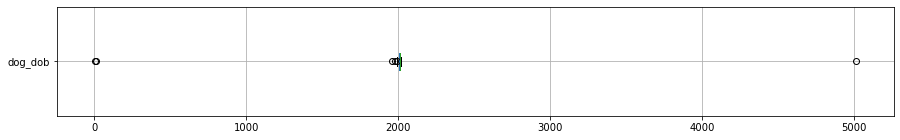

In [34]:
# boxplot dog age
df=dog_df1.loc[:,['dog_dob']]
df.boxplot(vert=False, figsize=(15,2))

In [35]:
#check for unreasonable dob values 
check_age1 = dog_df1['dog_dob'][(dog_df1['dog_dob'] < 1980) | (dog_df1['dog_dob'] > 2015)]
check_age1

1366    2016
2425    5012
3444    1962
3799       1
4062       8
Name: dog_dob, dtype: int64

In [36]:
dog_df1.iloc[2425]

id                               111954
owner_age                         41-50
owner_gender                          w
district                              3
quarter                              34
primary_breed    Parson Russell Terrier
breed_short                           K
dog_dob                            5012
dog_gender                            m
color                          tricolor
Name: 2425, dtype: object

In [37]:
check_age2 = dog_df2['dog_dob'][(dog_df2['dog_dob'] < 1980) | (dog_df2['dog_dob'] > 2016)]
check_age2

4295    5012
Name: dog_dob, dtype: int64

In [38]:
dog_df2.iloc[4295]

id                               111954
owner_age                         51-60
owner_gender                          w
district                              3
quarter                              34
primary_breed    Parson Russell Terrier
breed_short                           K
dog_dob                            5012
dog_gender                            m
color                          tricolor
Name: 4295, dtype: object

In [39]:
#Correct obviously incorrect dob from 5012 to 2012 in dog_df1 and dog_df2 (same do in both df's)
dog_df1['dog_dob'].iloc[2425] = 2012
dog_df2['dog_dob'].iloc[2425] = 2012

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [40]:
check_age3 = dog_df3['dog_dob'][(dog_df3['dog_dob'] < 1980) | (dog_df3['dog_dob'] > 2017)]
check_age3

Series([], Name: dog_dob, dtype: int64)

In [41]:
# remove anomalous ages that are unclear how to correct
dog_df1 = dog_df1.loc[(dog_df1['dog_dob'] > 1980) & (dog_df1['dog_dob'] < 2015)]
dog_df2 = dog_df2.loc[(dog_df2['dog_dob'] > 1980) & (dog_df2['dog_dob'] < 2016)]
dog_df3 = dog_df3.loc[(dog_df3['dog_dob'] > 1980) & (dog_df3['dog_dob'] < 2017)]

<AxesSubplot:>

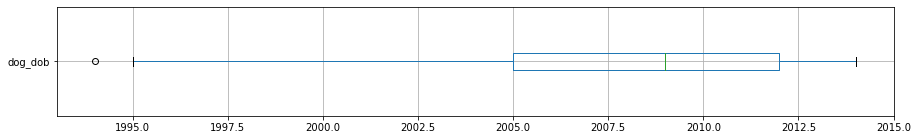

In [42]:
# boxplot dog age
df=dog_df1.loc[:,['dog_dob']]
df.boxplot(vert=False, figsize=(15,2))

In [43]:
# add column with dog age
dog_df1['dog_age'] = 2015 - dog_df1['dog_dob']
dog_df2['dog_age'] = 2016 - dog_df2['dog_dob']
dog_df3['dog_age'] = 2017 - dog_df3['dog_dob']

In [44]:
#add column for year data was collected and merge df's
dog_df1['survey_year'] = 2015
dog_df2['survey_year'] = 2016
dog_df3['survey_year'] = 2017

final_dog_df = pd.concat([dog_df1, dog_df2, dog_df3])
final_dog_df = final_dog_df.reset_index(drop=True)

final_dog_df.sample(10)

,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color,dog_age,survey_year
18136,118148,61-70,m,2.0,21.0,Mittelpudel,K,2005,w,apricot,12,2017
3326,99993,41-50,w,9.0,92.0,Parson Russell Terrier,K,2007,w,weiss/braun,8,2015
14683,85022,51-60,w,9.0,92.0,Foxterrier,K,2004,w,tricolor,13,2017
14173,82063,71-80,w,11.0,111.0,Mops,K,2002,m,beige,15,2017
7520,83141,61-70,w,2.0,23.0,Boxer,I,2013,w,gestromt,3,2016
289,126309,41-50,m,4.0,42.0,Tibetan Spaniel,K,2001,w,tricolor,14,2015
15858,90083,61-70,w,8.0,83.0,Langhaardackel,K,2006,m,schwarz/rot,11,2017
10870,109760,31-40,w,10.0,101.0,Schäfer,I,2001,m,braun/schwarz,15,2016
1607,118797,21-30,w,11.0,119.0,Mischling klein,K,2013,w,tricolor,2,2015
8348,87499,51-60,w,2.0,23.0,Mischling klein,K,2003,w,schwarz/braun,13,2016


In [45]:
#check final merged dataframe for missing values
(final_dog_df.isnull().sum())

id               0
owner_age        5
owner_gender     0
district         5
quarter          5
primary_breed    0
breed_short      0
dog_dob          0
dog_gender       0
color            0
dog_age          0
survey_year      0
dtype: int64

In [46]:
# drop rows with remaining missing values
final_dog_df= final_dog_df.dropna()
(final_dog_df.isnull().sum())

id               0
owner_age        0
owner_gender     0
district         0
quarter          0
primary_breed    0
breed_short      0
dog_dob          0
dog_gender       0
color            0
dog_age          0
survey_year      0
dtype: int64

In [47]:
#check shape of final cleaned dataframe
final_dog_df.shape

(20764, 12)

Explore and plot data

In [48]:
#Filter data on survey year
year = 2017
data_year_mask = final_dog_df['survey_year'] == year
data = final_dog_df[data_year_mask]
data.head(3)

,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color,dog_age,survey_year
13648,126,61-70,m,9.0,92.0,Welsh Terrier,K,2011,w,schwarz/braun,6,2017
13649,171,61-70,m,3.0,31.0,Berner Sennenhund,I,2009,m,tricolor,8,2017
13650,574,61-70,w,2.0,23.0,Mischling gross,I,2013,w,schwarz,4,2017


<AxesSubplot:>

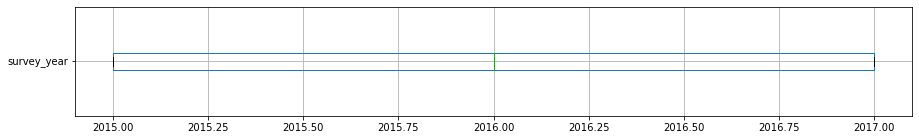

In [49]:
# boxplot dog age
df=final_dog_df.loc[:,['survey_year']]
df.boxplot(vert=False, figsize=(15,2))

<Figure size 576x720 with 0 Axes>

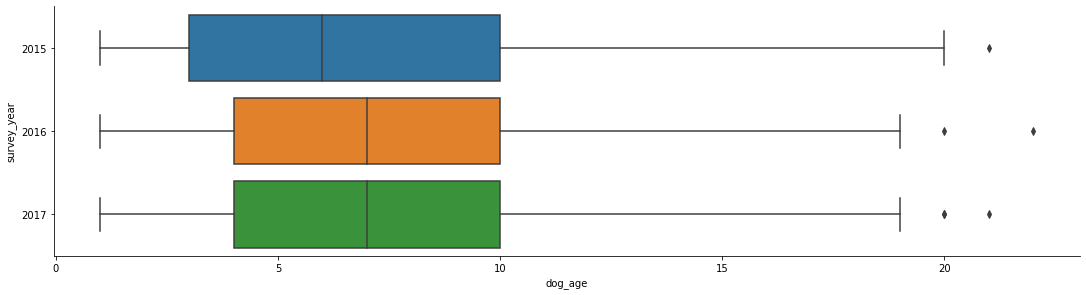

In [50]:
#compare different years within data
parameter = "dog_age"
plt.figure(figsize = (8,10))
_=sns.catplot(x=parameter,
                 y="survey_year", data=final_dog_df, height=4, aspect=15/4, kind="box", orient= "h")

In [51]:
# check data 2017 dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7122 entries, 13648 to 20770
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7122 non-null   int64  
 1   owner_age      7122 non-null   object 
 2   owner_gender   7122 non-null   object 
 3   district       7122 non-null   float64
 4   quarter        7122 non-null   float64
 5   primary_breed  7122 non-null   object 
 6   breed_short    7122 non-null   object 
 7   dog_dob        7122 non-null   int64  
 8   dog_gender     7122 non-null   object 
 9   color          7122 non-null   object 
 10  dog_age        7122 non-null   int64  
 11  survey_year    7122 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 723.3+ KB


In [52]:
#df with unique id' i.e. dog owners
data_unique_ID = data.drop_duplicates(subset=['id'], keep='first')
data_unique_ID.describe()

,id,district,quarter,dog_dob,dog_age,survey_year
count,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.0
mean,106523.777381,7.391250,76.470214,2009.818182,7.181818,2017.0
std,21312.187430,3.268612,33.108847,4.126640,4.126640,0.0
min,126.000000,1.000000,4.000000,1996.000000,1.000000,2017.0
25%,88846.250000,4.000000,44.000000,2007.000000,4.000000,2017.0
50%,107882.000000,8.000000,81.000000,2010.000000,7.000000,2017.0
75%,125226.500000,10.000000,102.000000,2013.000000,10.000000,2017.0
max,135731.000000,12.000000,123.000000,2016.000000,21.000000,2017.0


In [53]:
# There are more rows than unique ID's
# duplicate ID's represent owners with more than 1 dog

In [54]:
#df with owners of a single dog (dropping all duplicate ID's will result in owners with a single dog)
data_single_dog = data.drop_duplicates(subset=['id'], keep=False)
data_single_dog.describe()

,id,district,quarter,dog_dob,dog_age,survey_year
count,5895.000000,5895.000000,5895.000000,5895.000000,5895.000000,5895.0
mean,107054.103478,7.384563,76.403393,2009.840712,7.159288,2017.0
std,21327.459429,3.272003,33.151437,4.137061,4.137061,0.0
min,126.000000,1.000000,4.000000,1996.000000,1.000000,2017.0
25%,89030.000000,4.000000,44.000000,2007.000000,4.000000,2017.0
50%,109129.000000,8.000000,81.000000,2010.000000,7.000000,2017.0
75%,125651.500000,10.000000,102.000000,2013.000000,10.000000,2017.0
max,135731.000000,12.000000,123.000000,2016.000000,21.000000,2017.0


In [55]:
#No of peopelwith multiple dogs
data['id'].unique().size - data_single_dog['id'].size

551

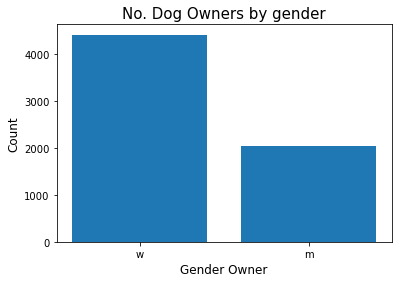

In [56]:
#Number of dog owner by gender
plt.title("No. Dog Owners by gender", size =15)
plt.xlabel("Gender Owner", size=12)
plt.ylabel("Count", size=12)
plt.bar(['w','m'],data_unique_ID['owner_gender'].value_counts())
plt.show()

In [57]:
data_unique_ID['owner_gender'].describe()

count     6446
unique       2
top          w
freq      4412
Name: owner_gender, dtype: object

<BarContainer object of 2 artists>

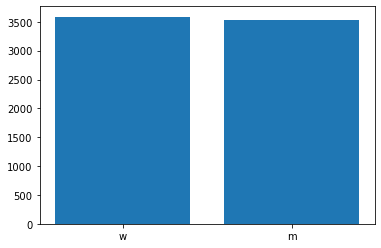

In [58]:
#gender of dogs
plt.bar(['w','m'],data['dog_gender'].value_counts())

In [59]:
data['dog_gender'].describe()

count     7122
unique       2
top          w
freq      3588
Name: dog_gender, dtype: object

In [60]:
#popularity of breeds by gender of owners
# calculate total, % of dogs owned by either gender and differences
genders_dogbreed=data.groupby(['primary_breed','owner_gender'])['id'].count().unstack()
genders_dogbreed=genders_dogbreed.fillna(0)
genders_dogbreed['total']=genders_dogbreed['w']+genders_dogbreed['m']
genders_dogbreed['m%']=genders_dogbreed['m']/2034*100
genders_dogbreed['w%']=genders_dogbreed['w']/4412*100
genders_dogbreed['delta'] = genders_dogbreed['m']-genders_dogbreed['w']
genders_dogbreed['delta%'] = genders_dogbreed['m%']-genders_dogbreed['w%']

In [61]:
#assess dataframe containing gender (owner and dog) information
genders_dogbreed.describe()

owner_gender,m,w,total,m%,w%,delta,delta%
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,7.194079,16.233553,23.427632,0.353691,0.367941,-9.039474,-0.014250
std,19.398679,44.512483,63.036173,0.953721,1.008896,27.235650,0.356120
min,0.000000,0.000000,1.000000,0.000000,0.000000,-278.000000,-3.174145
25%,1.000000,1.000000,2.000000,0.049164,0.022665,-7.000000,-0.045331
50%,2.000000,4.000000,5.000000,0.098328,0.090662,-2.000000,-0.011166
75%,6.000000,11.000000,16.000000,0.294985,0.249320,0.000000,0.070164
max,183.000000,440.000000,620.000000,8.997050,9.972801,5.000000,3.217358


In [62]:
#sort data frame by most common breeds
genders_dogbreed.sort_values(by=['total'], ascending=False).head(10)

owner_gender,m,w,total,m%,w%,delta,delta%
primary_breed,,,,,,,
Mischling klein,180.0,440.0,620.0,8.849558,9.972801,-260.0,-1.123244
Chihuahua,118.0,396.0,514.0,5.801377,8.975521,-278.0,-3.174145
Labrador Retriever,183.0,255.0,438.0,8.997050,5.779692,-72.0,3.217358
Yorkshire Terrier,78.0,216.0,294.0,3.834808,4.895739,-138.0,-1.060931
Jack Russel Terrier,101.0,188.0,289.0,4.965585,4.261106,-87.0,0.704479
Französische Bulldogge,79.0,133.0,212.0,3.883972,3.014506,-54.0,0.869467
Mischling gross,61.0,145.0,206.0,2.999017,3.286491,-84.0,-0.287475
Malteser,44.0,160.0,204.0,2.163225,3.626473,-116.0,-1.463248
Mops,43.0,128.0,171.0,2.114061,2.901179,-85.0,-0.787118


In [63]:
#sort dataframe by biggest difference between male and female owners
# in % of dogs owned by each gender
genders_dogbreed.sort_values(by=['delta%'], ascending=True).head(5)

owner_gender,m,w,total,m%,w%,delta,delta%
primary_breed,,,,,,,
Chihuahua,118.0,396.0,514.0,5.801377,8.975521,-278.0,-3.174145
Bolonka Zwetna,11.0,89.0,100.0,0.540806,2.017226,-78.0,-1.476419
Malteser,44.0,160.0,204.0,2.163225,3.626473,-116.0,-1.463248
Pudel,14.0,86.0,100.0,0.688299,1.949229,-72.0,-1.260930
Mischling klein,180.0,440.0,620.0,8.849558,9.972801,-260.0,-1.123244


In [64]:
#sort dataframe by biggest difference in % between male and female owners
genders_dogbreed.sort_values(by=['delta%'], ascending=False).head(5)

owner_gender,m,w,total,m%,w%,delta,delta%
primary_breed,,,,,,,
Labrador Retriever,183.0,255.0,438.0,8.997050,5.779692,-72.0,3.217358
Französische Bulldogge,79.0,133.0,212.0,3.883972,3.014506,-54.0,0.869467
Beagle,41.0,53.0,94.0,2.015733,1.201269,-12.0,0.814463
Jack Russel Terrier,101.0,188.0,289.0,4.965585,4.261106,-87.0,0.704479
Deutscher Schäfer,31.0,37.0,68.0,1.524090,0.838622,-6.0,0.685469


<AxesSubplot:xlabel='primary_breed'>

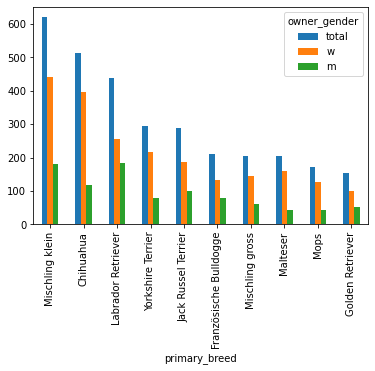

In [65]:
#plot most popuar breeds total numbers, male and female owners
(genders_dogbreed.sort_values(by=['total'], ascending=False).head(10))[[ 'total', 'w', 'm']].plot(kind='bar')

<AxesSubplot:xlabel='primary_breed'>

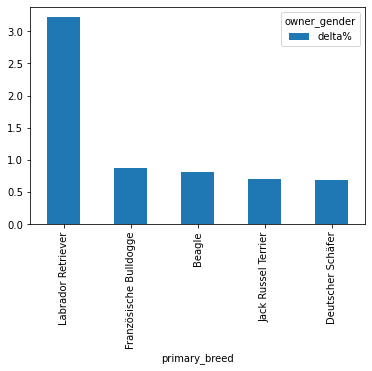

In [66]:
#plot brees that are most popular with male vs female owners in % of all dogs ownwed by men
(genders_dogbreed.sort_values(by=['delta%'], ascending=False).head(5))[['delta%']].plot(kind='bar')

In [67]:
genders_dogbreed.sort_values(by=['delta%'], ascending=False).head(5)

owner_gender,m,w,total,m%,w%,delta,delta%
primary_breed,,,,,,,
Labrador Retriever,183.0,255.0,438.0,8.997050,5.779692,-72.0,3.217358
Französische Bulldogge,79.0,133.0,212.0,3.883972,3.014506,-54.0,0.869467
Beagle,41.0,53.0,94.0,2.015733,1.201269,-12.0,0.814463
Jack Russel Terrier,101.0,188.0,289.0,4.965585,4.261106,-87.0,0.704479
Deutscher Schäfer,31.0,37.0,68.0,1.524090,0.838622,-6.0,0.685469


<AxesSubplot:xlabel='primary_breed'>

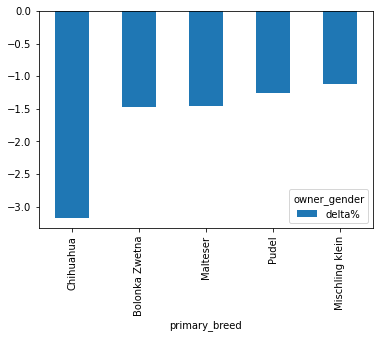

In [68]:
#plot brees that are most popular with female vs male owners in % of all dogs owned by women
(genders_dogbreed.sort_values(by=['delta%']).head(5))[['delta%']].plot(kind='bar')

In [69]:
genders_dogbreed.sort_values(by=['delta%'], ascending=False).tail(5)

owner_gender,m,w,total,m%,w%,delta,delta%
primary_breed,,,,,,,
Mischling klein,180.0,440.0,620.0,8.849558,9.972801,-260.0,-1.123244
Pudel,14.0,86.0,100.0,0.688299,1.949229,-72.0,-1.260930
Malteser,44.0,160.0,204.0,2.163225,3.626473,-116.0,-1.463248
Bolonka Zwetna,11.0,89.0,100.0,0.540806,2.017226,-78.0,-1.476419
Chihuahua,118.0,396.0,514.0,5.801377,8.975521,-278.0,-3.174145


<AxesSubplot:xlabel='primary_breed'>

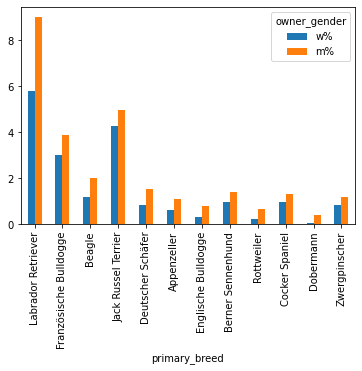

In [70]:
#plot brees that are most popular with male vs female owners in % of all dogs ownwed by men
(genders_dogbreed.sort_values(by=['delta%'], ascending=False).head(12))[['w%','m%']].plot(kind='bar')

<AxesSubplot:xlabel='primary_breed'>

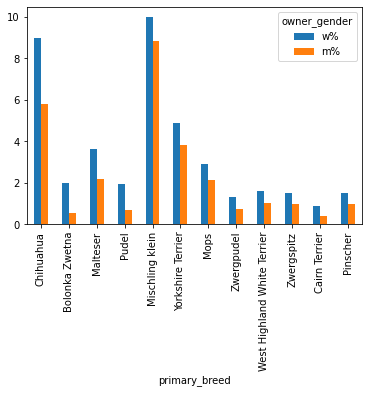

In [71]:
#plot brees that are most popular with male vs female owners in % of all dogs ownwed by women
(genders_dogbreed.sort_values(by=['delta%'], ascending=True).head(12))[['w%','m%']].plot(kind='bar')

In [72]:
#ratio of individual popular breeds owned by women vs men
dog_gender=data.groupby(['primary_breed','dog_gender'])['id'].count().unstack()
dog_gender=dog_gender.fillna(0)
dog_gender['total']=dog_gender['w']+dog_gender['m']
dog_gender['ratio']=dog_gender['w']/dog_gender['m']
dog_gender.sort_values(by=['total'], ascending=False).head(5)

dog_gender,m,w,total,ratio
primary_breed,,,,
Mischling klein,255.0,365.0,620.0,1.431373
Chihuahua,266.0,248.0,514.0,0.932331
Labrador Retriever,232.0,206.0,438.0,0.887931
Yorkshire Terrier,143.0,151.0,294.0,1.055944
Jack Russel Terrier,153.0,136.0,289.0,0.888889


<AxesSubplot:xlabel='primary_breed'>

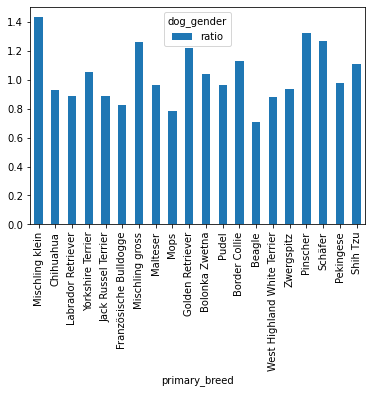

In [73]:
#plot ratio of individual popular breeds owned by women vs men
(dog_gender.sort_values(by=['total'], ascending=False).head(20))[['ratio']].plot(kind='bar')

In [74]:
#relationship between gender of owner and gender of dog
gender_dog=data.groupby(['dog_gender','owner_gender'])['id'].count().unstack()
gender_dog

owner_gender,m,w
dog_gender,,
m,1170,2364
w,1017,2571


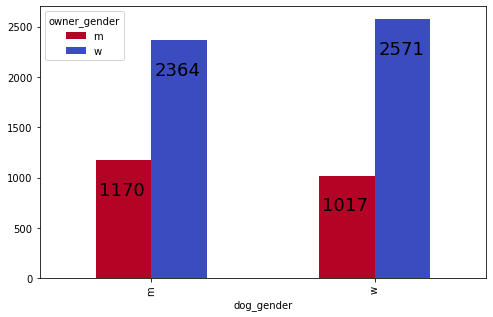

In [75]:
fig, ax = plt.subplots(figsize=(8, 5))
gender_dog.plot(kind='bar',ax=ax,colormap=plt.cm.coolwarm_r, grid=False)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.12, p.get_height()), ha='center', va='top', color='black', size=18)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


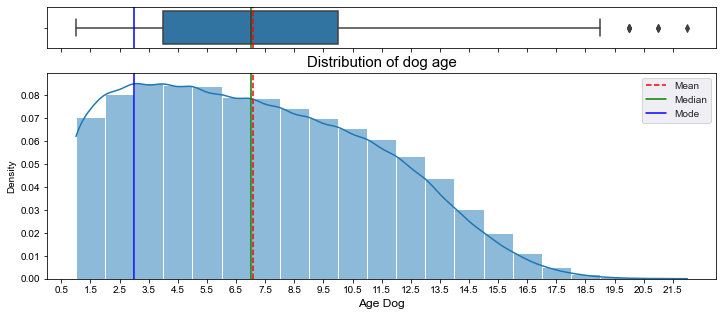

In [76]:
#age distribution of age of dogs
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(12,5))

data_plot = final_dog_df['dog_age']

mean=data_plot.mean()
median=data_plot.median()
mode=data_plot.mode().values[0]

sns.set_style("darkgrid")

sns.boxplot(data_plot, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data_plot, binwidth = 1, kde=True, stat="density")
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

plt.xticks(np.arange(min(data_plot)-0.5, max(data_plot)+0.5, 1))
plt.xlabel('Age Dog', fontsize=12)
plt.title("Distribution of dog age", fontsize=15)
plt.xlim(min(data_plot)-1, max(data_plot) + 1)

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()


<Figure size 576x720 with 0 Axes>

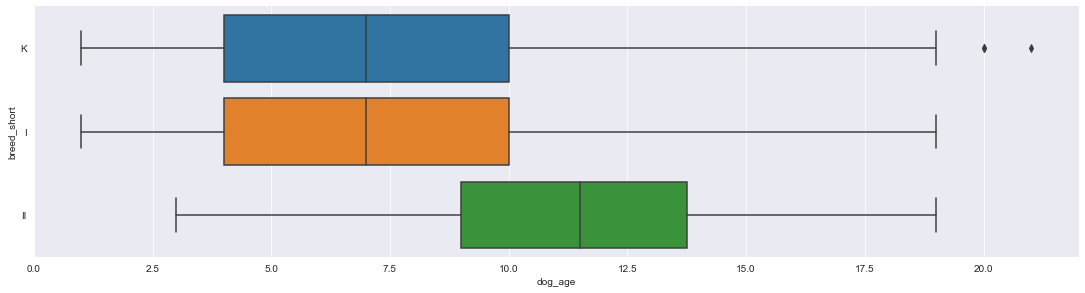

In [77]:
#boxplot of dog age by type of breeds
# not ver useful plot
parameter = "dog_age"
plt.figure(figsize = (8,10))
_=sns.catplot(x=parameter,
                 y="breed_short", data=data, height=4, aspect=15/4, kind="box", orient= "h")

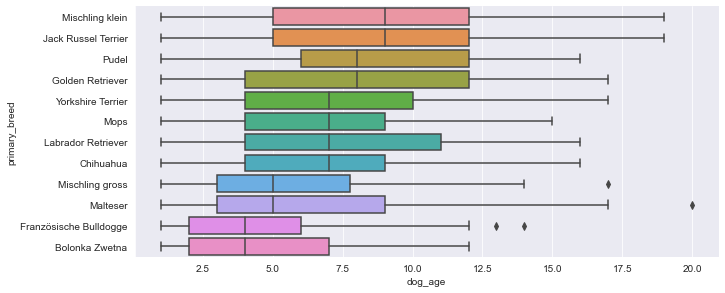

In [78]:
#boxplot of age distribution of most popular breeds
data_plot = data
breed_list_pop = ['Mischling klein','Chihuahua', 'Labrador Retriever' , 'Yorkshire Terrier' , 'Jack Russel Terrier', 'Französische Bulldogge' , 'Mischling gross', 'Malteser', 'Mops', 'Golden Retriever', 'Bolonka Zwetna' ,'Pudel']
data_plot = data_plot[data_plot['primary_breed'].isin(breed_list_pop)]

parameter = "dog_age"
order = data_plot.groupby('primary_breed')['dog_age'].median().fillna(0).sort_values()[::-1].index
g=sns.catplot(x=parameter,
                 y="primary_breed", data=data_plot, order=order, height=4, aspect=20/8, kind="box", orient= "h")

In [79]:
#list of dog breeds with highest median age
#statistically not very useful because it does not include number of dogs of respective breed
list_age = data.groupby('primary_breed')['dog_age'].median().fillna(0).sort_values()[::-1].index
list_age = list_age.tolist()
list_age

['Pit Bull Terrier',
 'Jura Laufhund',
 'Laufhund',
 'Münsterländer',
 'Katalanischer Hirtenhund',
 'Windspiel',
 'Niederlaufhund',
 'Welsh Springer Spaniel',
 'Polski Owczarek Nizinny',
 'Coton de Tulear',
 'Field Spaniel',
 'Entlebucher',
 'Maremmano',
 'Greyhound',
 'Staffordshire Bull Terrier',
 'Langhaardackel',
 'Cattle Dog',
 'Schapendoes',
 'Basset Griffon vendéen',
 'Petit Basset Griffon',
 'Silky Terrier',
 'Altdeutscher Hütehund',
 'Kerry Blue Terrier',
 "Gos d'Atura Català",
 'Dogge',
 'Volpino',
 'Chow Chow',
 'Soft Coated Wheaten Terrier',
 'Teckel',
 "Cirneco dell'Etna",
 'Tervueren',
 'Hirtenhund',
 'Scottish Terrier',
 'Tibet Terrier',
 'Cairn Terrier',
 'Podenco Ibicenco',
 'Breton',
 'Welsh Corgi',
 'Appenzeller',
 'Poitevin Jagdhund',
 'West Highland White Terrier',
 'Beauceron Berge de Beauce',
 'Beauceron',
 'American Staffordshire Terrier',
 'Retriever',
 'Berger de Brie',
 'Kromfohrländer',
 'Welsh Corgi Cardigan',
 'Bulldog',
 'Deutscher Langhaarschäfer',
 'Sch

In [80]:
#list of breeds with more than n dogs in data set
n=50
count_breeds = data.groupby('primary_breed').count()
count_breeds = count_breeds.rename(columns={'id':'count'})
age_filter = count_breeds.loc[count_breeds['count'] > n]
age_filter = (age_filter['count']).index.tolist()

<AxesSubplot:title={'center':'Age of dogs by breed, n>50'}, xlabel='dog_age', ylabel='primary_breed'>

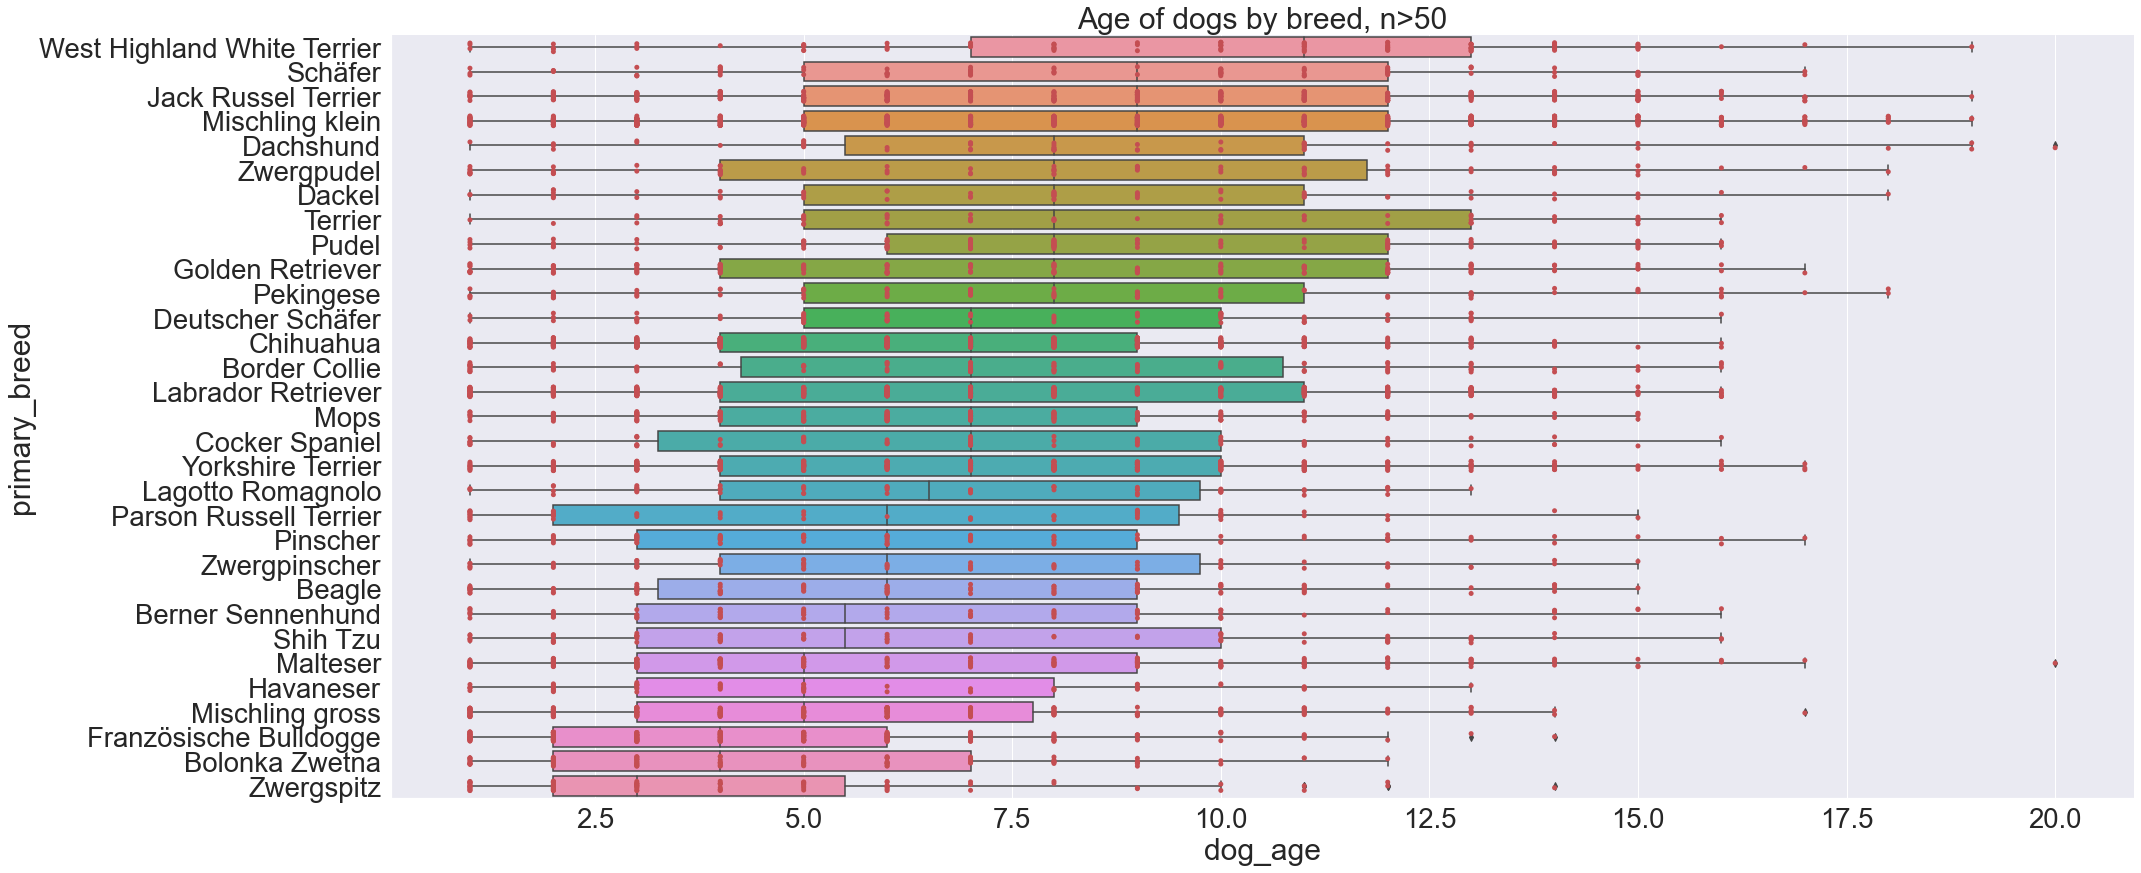

In [81]:
#boxplot of age distribution of most popular breeds defined by n, sorted by median age
data_plot = data
#breed_list = ['Pit Bull Terrier']
data_plot = data_plot[data_plot['primary_breed'].isin(age_filter)]

sns.set(font_scale=2.5)
#ax.set_title('Age of dogs by breed')
parameter = "dog_age"
order = data_plot.groupby('primary_breed')['dog_age'].median().fillna(0).sort_values()[::-1].index
g=sns.catplot(x=parameter,
                 y="primary_breed", data=data_plot, order=order, height=12, aspect=20/8,  kind="box", orient= "h").set(title='Age of dogs by breed, n>50')
sns.stripplot(x=parameter,
                y="primary_breed", data=data_plot, jitter=0.2, order=order, color = 'r', size=5, ax=g.ax, orient= "h")

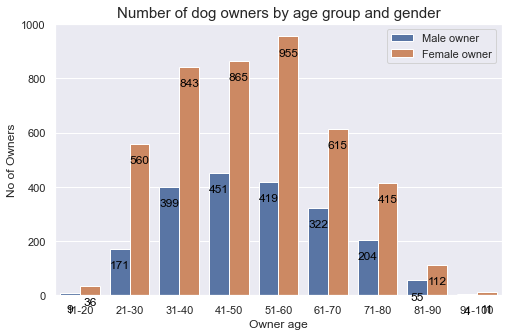

In [82]:
#distribution of owner age by gender
data_plot = data_unique_ID

sns.set()
plt.figure(figsize=(8,5))
owner_age = (data_plot['owner_age'].sort_values())
ax = sns.countplot(x=owner_age, data=data,  hue=data['owner_gender']) #color='b') #,
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)

l = plt.legend()
l.get_texts()[1].set_text('Female owner')
l.get_texts()[0].set_text('Male owner')

plt.xlabel('Owner age', fontsize=12)
plt.ylabel('No of Owners', fontsize=12)
plt.title('Number of dog owners by age group and gender', fontsize=15)

plt.show()

In [83]:
# male female ratio of dog owners by age group
owner_age_unique=data_unique_ID.groupby(['owner_age','owner_gender'])['id'].count().unstack()
owner_age_unique['ratio'] = owner_age_unique['w']/owner_age_unique['m']
owner_age_unique

owner_gender,m,w,ratio
owner_age,,,
11-20,9,36,4.000000
21-30,171,560,3.274854
31-40,399,843,2.112782
41-50,451,865,1.917960
51-60,419,955,2.279236
61-70,322,615,1.909938
71-80,204,415,2.034314
81-90,55,112,2.036364
91-100,4,11,2.750000


<AxesSubplot:title={'center':'Dog owner gender ratio by age group'}, xlabel='owner_age', ylabel='Ratio female/male'>

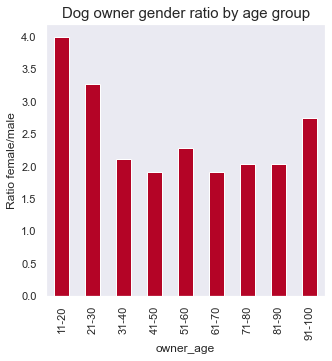

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.ylabel('Ratio female/male', fontsize=12)
plt.title('Dog owner gender ratio by age group', fontsize=15)
owner_age_unique['ratio'].plot(kind='bar',ax=ax,colormap=plt.cm.coolwarm_r, grid=False)

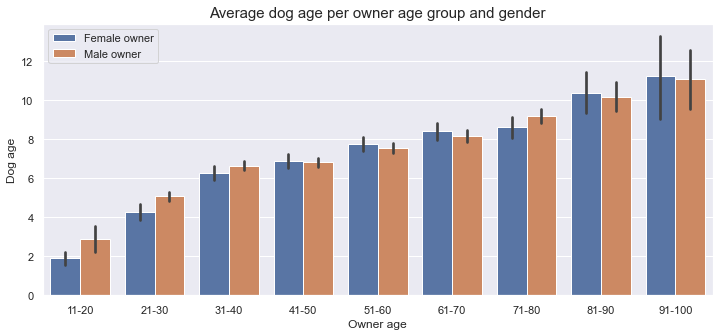

In [85]:
# average dog age by age group and gender of owner
data_plot = data

plt.figure(figsize=(12,5))
owner_age = (data_plot['owner_age'].sort_values())
ax = sns.barplot(x=owner_age, y=data['dog_age'], hue=data['owner_gender'])

l = plt.legend()
l.get_texts()[0].set_text('Female owner')
l.get_texts()[1].set_text('Male owner')

plt.xlabel('Owner age', fontsize=12)
plt.ylabel('Dog age', fontsize=12)
plt.title('Average dog age per owner age group and gender', fontsize=15)

plt.show()

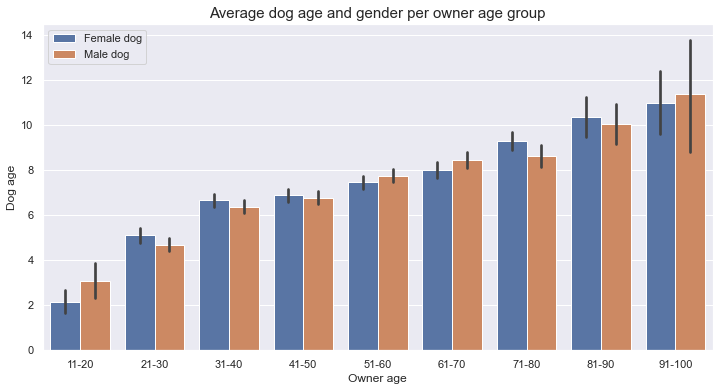

In [86]:
# average dog age by age group and gender of dog
data_plot = data

plt.figure(figsize=(12,6))
owner_age = (data_plot['owner_age'].sort_values())
ax = sns.barplot(x=owner_age, y=data['dog_age'], hue=data['dog_gender'])

l = plt.legend()
l.get_texts()[0].set_text('Female dog')
l.get_texts()[1].set_text('Male dog')

plt.xlabel('Owner age', fontsize=12)
plt.ylabel('Dog age', fontsize=12)
plt.title('Average dog age and gender per owner age group', fontsize=15)

plt.show()

In [87]:
#number of dogs by age group and city districts
data_plot = data_unique_ID.groupby(['district','owner_age']).size()
data_plot = data_plot.reset_index(name = 'count')
data_plot = data_plot.pivot(index = 'district', columns = 'owner_age', values = 'count')
data_plot['sum'] = data_plot.sum(axis = 1)
data_plot = data_plot.sort_values('district')
data_plot

owner_age,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,sum
district,,,,,,,,,,
1.0,NaN,10.0,21.0,26.0,27.0,16.0,9.0,1.0,NaN,110.0
2.0,3.0,57.0,113.0,140.0,114.0,81.0,54.0,17.0,NaN,579.0
3.0,1.0,61.0,137.0,124.0,121.0,73.0,46.0,11.0,1.0,575.0
4.0,2.0,50.0,70.0,69.0,76.0,54.0,23.0,7.0,1.0,352.0
5.0,1.0,30.0,63.0,57.0,37.0,16.0,10.0,3.0,1.0,218.0
6.0,3.0,39.0,91.0,112.0,85.0,62.0,58.0,14.0,2.0,466.0
7.0,5.0,45.0,114.0,164.0,206.0,170.0,131.0,43.0,6.0,884.0
8.0,1.0,29.0,55.0,65.0,89.0,56.0,39.0,8.0,1.0,343.0
9.0,7.0,95.0,162.0,143.0,158.0,124.0,56.0,16.0,2.0,763.0


<AxesSubplot:xlabel='owner_age', ylabel='district'>

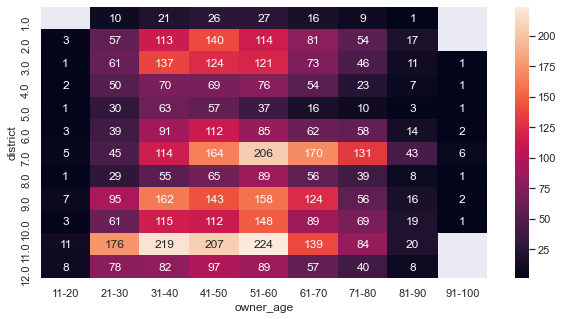

In [88]:
data_heatmap = data_plot.drop(columns=['sum'])
plt.figure(figsize=(10,5)) 
sns.heatmap(data_heatmap.head(12), annot=True, fmt= '.3g')

In [89]:
#number of dogs by age group and most popular breeds
data_plot = data.groupby(['primary_breed','owner_age']).size()
data_plot = data_plot.reset_index(name = 'count')
data_plot = data_plot.pivot(index = 'primary_breed', columns = 'owner_age', values = 'count')
data_plot['sum'] = data_plot.sum(axis = 1)
data_plot = data_plot.sort_values('sum', ascending = False).head(20)
data_plot

owner_age,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,sum
primary_breed,,,,,,,,,,
Mischling klein,2.0,41.0,104.0,109.0,146.0,125.0,76.0,15.0,2.0,620.0
Chihuahua,7.0,111.0,117.0,114.0,92.0,39.0,27.0,7.0,NaN,514.0
Labrador Retriever,2.0,35.0,86.0,94.0,104.0,63.0,44.0,8.0,2.0,438.0
Yorkshire Terrier,3.0,28.0,50.0,66.0,67.0,42.0,25.0,12.0,1.0,294.0
Jack Russel Terrier,2.0,28.0,57.0,65.0,74.0,40.0,18.0,4.0,1.0,289.0
Französische Bulldogge,1.0,81.0,60.0,32.0,22.0,10.0,5.0,1.0,NaN,212.0
Mischling gross,3.0,39.0,56.0,46.0,35.0,15.0,10.0,2.0,NaN,206.0
Malteser,2.0,22.0,42.0,48.0,42.0,32.0,9.0,6.0,1.0,204.0
Mops,1.0,38.0,49.0,24.0,30.0,13.0,14.0,2.0,NaN,171.0


<AxesSubplot:xlabel='owner_age', ylabel='primary_breed'>

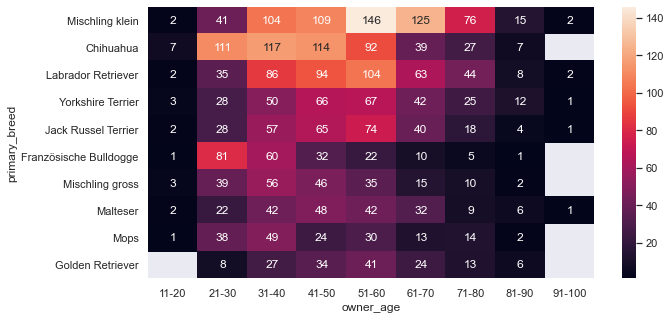

In [90]:
data_heatmap = data_plot.drop(columns=['sum'])
plt.figure(figsize=(10,5)) 
sns.heatmap(data_heatmap.head(10), annot=True, fmt= '.3g')

In [91]:
#number of dogs by age group and most popular breeds of female owners
gender_mask = data['owner_gender']=='w'
data_plot = data[gender_mask]
data_plot = data_plot.groupby(['primary_breed','owner_age']).size()
data_plot = data_plot.reset_index(name = 'count')
data_plot = data_plot.pivot(index = 'primary_breed', columns = 'owner_age', values = 'count')
data_plot['sum'] = data_plot.sum(axis = 1)
data_plot = data_plot.sort_values('sum', ascending = False).head(20)
data_plot

owner_age,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,sum
primary_breed,,,,,,,,,,
Mischling klein,2.0,32.0,74.0,78.0,103.0,84.0,54.0,11.0,2.0,440.0
Chihuahua,6.0,94.0,92.0,75.0,77.0,29.0,18.0,5.0,NaN,396.0
Labrador Retriever,1.0,25.0,53.0,54.0,65.0,31.0,20.0,5.0,1.0,255.0
Yorkshire Terrier,3.0,22.0,35.0,44.0,53.0,30.0,19.0,9.0,1.0,216.0
Jack Russel Terrier,2.0,19.0,33.0,42.0,55.0,24.0,11.0,2.0,NaN,188.0
Malteser,2.0,19.0,34.0,40.0,29.0,25.0,5.0,5.0,1.0,160.0
Mischling gross,3.0,28.0,38.0,32.0,27.0,9.0,8.0,NaN,NaN,145.0
Französische Bulldogge,1.0,56.0,37.0,18.0,9.0,7.0,4.0,1.0,NaN,133.0
Mops,NaN,30.0,32.0,16.0,24.0,12.0,13.0,1.0,NaN,128.0


<AxesSubplot:xlabel='owner_age', ylabel='primary_breed'>

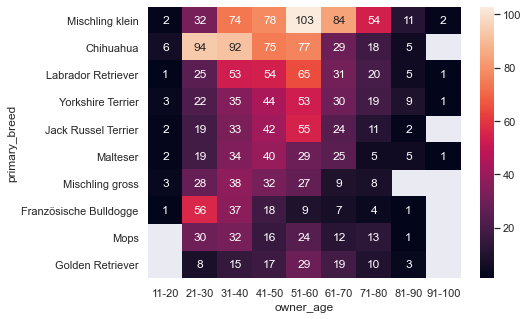

In [92]:
data_heatmap = data_plot.drop(columns=['sum'])
plt.figure(figsize=(7,5)) 
sns.heatmap(data_heatmap.head(10), annot=True, fmt= '.3g')

In [93]:
#number of dogs by age group and most popular breeds of male owners
gender_mask = data['owner_gender']=='m'
data_plot = data[gender_mask]
data_plot = data_plot.groupby(['primary_breed','owner_age']).size()
data_plot = data_plot.reset_index(name = 'count')
data_plot = data_plot.pivot(index = 'primary_breed', columns = 'owner_age', values = 'count')
data_plot['sum'] = data_plot.sum(axis = 1)
data_plot = data_plot.sort_values('sum', ascending = False).head(20)
data_plot

owner_age,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,sum
primary_breed,,,,,,,,,,
Labrador Retriever,1.0,10.0,33.0,40.0,39.0,32.0,24.0,3.0,1.0,183.0
Mischling klein,NaN,9.0,30.0,31.0,43.0,41.0,22.0,4.0,NaN,180.0
Chihuahua,1.0,17.0,25.0,39.0,15.0,10.0,9.0,2.0,NaN,118.0
Jack Russel Terrier,NaN,9.0,24.0,23.0,19.0,16.0,7.0,2.0,1.0,101.0
Französische Bulldogge,NaN,25.0,23.0,14.0,13.0,3.0,1.0,NaN,NaN,79.0
Yorkshire Terrier,NaN,6.0,15.0,22.0,14.0,12.0,6.0,3.0,NaN,78.0
Mischling gross,NaN,11.0,18.0,14.0,8.0,6.0,2.0,2.0,NaN,61.0
Golden Retriever,NaN,NaN,12.0,17.0,12.0,5.0,3.0,3.0,NaN,52.0
Malteser,NaN,3.0,8.0,8.0,13.0,7.0,4.0,1.0,NaN,44.0


<AxesSubplot:xlabel='owner_age', ylabel='primary_breed'>

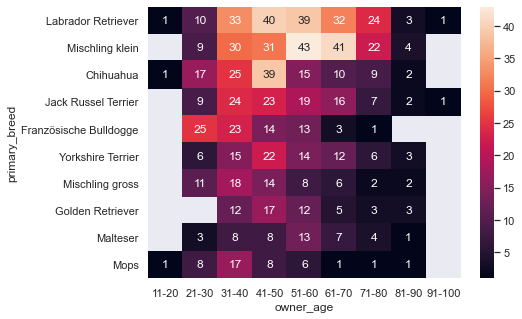

In [94]:
data_heatmap = data_plot.drop(columns=['sum'])
plt.figure(figsize=(7,5)) 
sns.heatmap(data_heatmap.head(10), annot=True, fmt= '.3g')

In [95]:
#list of total number of dogs and % of most popular breeds
breeds = data['primary_breed'].value_counts()
breeds_percent = (breeds/sum(breeds)*100)

In [96]:
breeds.head(12)

Mischling klein           620
Chihuahua                 514
Labrador Retriever        438
Yorkshire Terrier         294
Jack Russel Terrier       289
Französische Bulldogge    212
Mischling gross           206
Malteser                  204
Mops                      171
Golden Retriever          153
Bolonka Zwetna            100
Pudel                     100
Name: primary_breed, dtype: int64

In [97]:
breeds_percent.head(12)

Mischling klein           8.705420
Chihuahua                 7.217074
Labrador Retriever        6.149958
Yorkshire Terrier         4.128054
Jack Russel Terrier       4.057849
Französische Bulldogge    2.976692
Mischling gross           2.892446
Malteser                  2.864364
Mops                      2.401011
Golden Retriever          2.148273
Bolonka Zwetna            1.404100
Pudel                     1.404100
Name: primary_breed, dtype: float64

In [98]:
#most popular breeds by district (Kreis)
data = final_dog_df[data_year_mask]
district_1 = data[data['district'] == 1]
district_2 = data[data['district'] == 2]
district_3 = data[data['district'] == 3]
district_4 = data[data['district'] == 4]
district_5 = data[data['district'] == 5]
district_6 = data[data['district'] == 6]
district_7 = data[data['district'] == 7]
district_8 = data[data['district'] == 8]
district_9 = data[data['district'] == 9]
district_10 = data[data['district'] == 1]
district_11 = data[data['district'] == 11]
district_12 = data[data['district'] == 12]

<ipython-input-99-b3670b08f152>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(d1_races_percent.index, rotation=30, fontsize=15)
<ipython-input-99-b3670b08f152>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(d2_races_percent.index, rotation=30, fontsize=15)
<ipython-input-99-b3670b08f152>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(d3_races_percent.index, rotation=30, fontsize=15)
<ipython-input-99-b3670b08f152>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(d4_races_percent.index, rotation=30, fontsize=15)
<ipython-input-99-b3670b08f152>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(d5_races_percent.index, rotation=30, fontsize=15)
<ipython-input-99-b3670b08f152>:57: UserWarning: FixedFormatter should only be used t

[Text(0, 0, 'Chihuahua'),
 Text(1, 0, 'Yorkshire Terrier'),
 Text(2, 0, 'Mischling klein'),
 Text(3, 0, 'Malteser'),
 Text(4, 0, 'Labrador Retriever')]

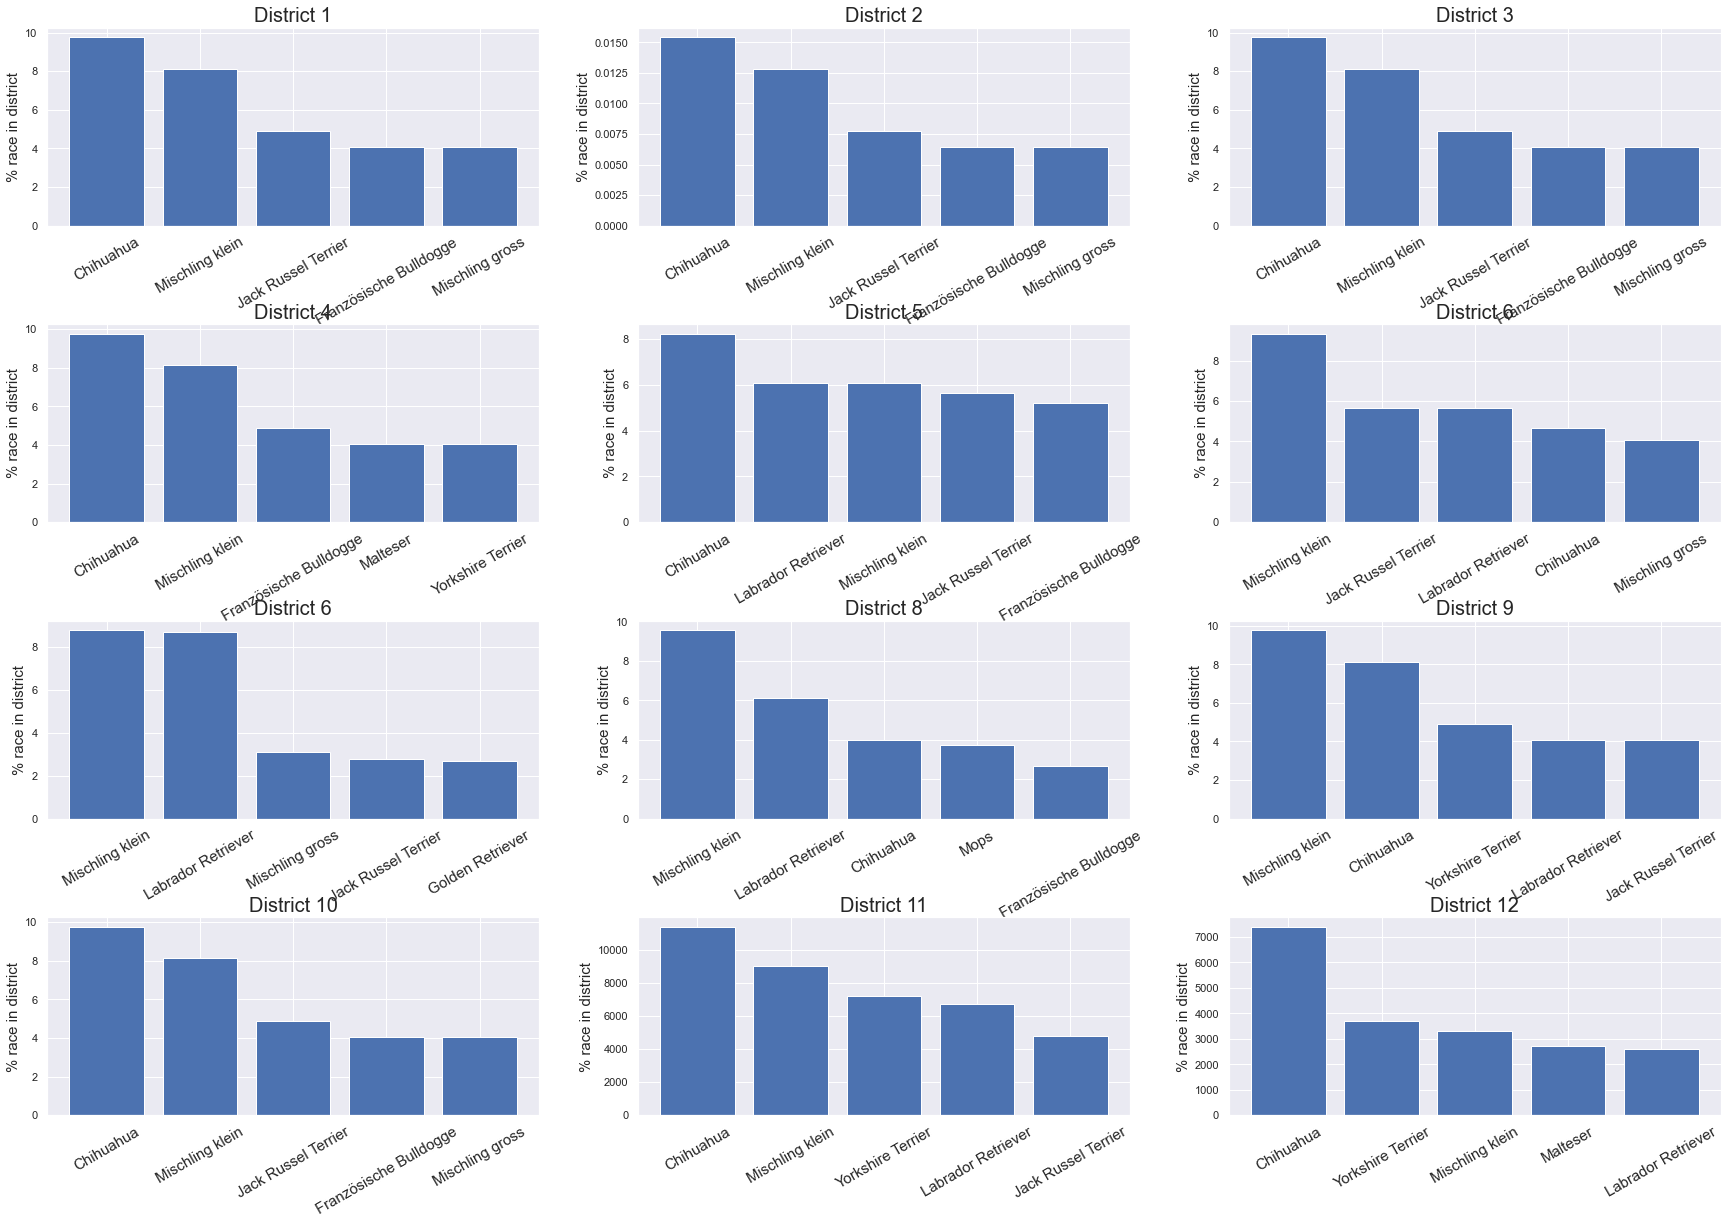

In [99]:
#most popular breeds by district (Kreis)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=4, ncols=3, figsize=(30,20))
plt.subplots_adjust(hspace=0.5)

# district 1 plot
d1_races = district_1['primary_breed'].value_counts()
d1_races = d1_races/sum(d1_races)
d1_races_percent = (d1_races*100).head(5)
ax1.bar(d1_races_percent.index , d1_races_percent)
ax1.set_title('District 1', fontsize=20)
ax1.set_ylabel('% race in district', fontsize=15)
ax1.set_xticklabels(d1_races_percent.index, rotation=30, fontsize=15)

# district 2 plot
d2_races = district_2['primary_breed'].value_counts()
d2_races = d1_races/sum(d2_races)
d2_races_percent = (d2_races*100).head(5)
ax2.bar(d2_races_percent.index , d2_races_percent)
ax2.set_title('District 2', fontsize=20)
ax2.set_ylabel('% race in district', fontsize=15)
ax2.set_xticklabels(d2_races_percent.index, rotation=30, fontsize=15)

# district 3 plot
d3_races = district_3['primary_breed'].value_counts()
d3_races = d1_races/sum(d1_races)
d3_races_percent = (d3_races*100).head(5)
ax3.bar(d1_races_percent.index , d1_races_percent)
ax3.set_title('District 3', fontsize=20)
ax3.set_ylabel('% race in district', fontsize=15)
ax3.set_xticklabels(d3_races_percent.index, rotation=30, fontsize=15)

# district 4 plot
d4_races = district_4['primary_breed'].value_counts()
d4_races = d4_races/sum(d4_races)
d4_races_percent = (d4_races*100).head(5)
ax4.bar(d4_races_percent.index , d1_races_percent)
ax4.set_title('District 4', fontsize=20)
ax4.set_ylabel('% race in district', fontsize=15)
ax4.set_xticklabels(d4_races_percent.index, rotation=30, fontsize=15)

# district 5 plot
d5_races = district_5['primary_breed'].value_counts()
d5_races = d5_races/sum(d5_races)
d5_races_percent = (d5_races*100).head(5)
ax5.bar(d5_races_percent.index , d5_races_percent)
ax5.set_title('District 5', fontsize=20)
ax5.set_ylabel('% race in district', fontsize=15)
ax5.set_xticklabels(d5_races_percent.index, rotation=30, fontsize=15)

# district 6 plot
d6_races = district_6['primary_breed'].value_counts()
d6_races = d6_races/sum(d6_races)
d6_races_percent = (d6_races*100).head(5)
ax6.bar(d6_races_percent.index , d6_races_percent)
ax6.set_title('District 6', fontsize=20)
ax6.set_ylabel('% race in district', fontsize=15)
ax6.set_xticklabels(d6_races_percent.index, rotation=30, fontsize=15)

# district 7 plot
d7_races = district_7['primary_breed'].value_counts()
d7_races = d7_races/sum(d7_races)
d7_races_percent = (d7_races*100).head(5)
ax7.bar(d6_races_percent.index , d7_races_percent)
ax7.set_title('District 6', fontsize=20)
ax7.set_ylabel('% race in district', fontsize=15)
ax7.set_xticklabels(d7_races_percent.index, rotation=30, fontsize=15)

# district 8 plot
d8_races = district_8['primary_breed'].value_counts()
d8_races = d8_races/sum(d8_races)
d8_races_percent = (d8_races*100).head(5)
ax8.bar(d8_races_percent.index , d8_races_percent)
ax8.set_title('District 8', fontsize=20)
ax8.set_ylabel('% race in district', fontsize=15)
ax8.set_xticklabels(d8_races_percent.index, rotation=30, fontsize=15)

# district 9 plot
d9_races = district_9['primary_breed'].value_counts()
d9_races = d9_races/sum(d9_races)
d9_races_percent = (d9_races*100).head(5)
ax9.bar(d1_races_percent.index , d1_races_percent)
ax9.set_title('District 9', fontsize=20)
ax9.set_ylabel('% race in district', fontsize=15)
ax9.set_xticklabels(d9_races_percent.index, rotation=30, fontsize=15)

# district 10 plot
d10_races = district_10['primary_breed'].value_counts()
d10_races = d1_races/sum(d10_races)
d10_races_percent = (d10_races*100).head(5)
ax10.bar(d10_races_percent.index , d1_races_percent)
ax10.set_title('District 10', fontsize=20)
ax10.set_ylabel('% race in district', fontsize=15)
ax10.set_xticklabels(d10_races_percent.index, rotation=30, fontsize=15)

# district 11 plot
d11_races = district_11['primary_breed'].value_counts()
d11_races = d11_races/sum(d1_races)
d11_races_percent = (d11_races*100).head(5)
ax11.bar(d11_races_percent.index , d11_races_percent)
ax11.set_title('District 11', fontsize=20)
ax11.set_ylabel('% race in district', fontsize=15)
ax11.set_xticklabels(d11_races_percent.index, rotation=30, fontsize=15)

# district 12 plot
d12_races = district_12['primary_breed'].value_counts()
d12_races = d12_races/sum(d1_races)
d12_races_percent = (d12_races*100).head(5)
ax12.bar(d12_races_percent.index , d12_races_percent)
ax12.set_title('District 12', fontsize=20)
ax12.set_ylabel('% race in district', fontsize=15)
ax12.set_xticklabels(d12_races_percent.index, rotation=30, fontsize=15)


In [100]:
#% of breeds within one city district for most popular breed
data_plot = data.groupby(['district','primary_breed']).size()
data_plot = data_plot.reset_index(name = 'count')
data_plot = data_plot.pivot(index = 'district', columns = 'primary_breed', values = 'count')

data_plot = (data_plot.T / data_plot.T.sum()).T
data_plot.fillna(0)
data_plot = data_plot[['Mischling klein','Chihuahua', 'Labrador Retriever' , 'Yorkshire Terrier' , 'Jack Russel Terrier', 'Französische Bulldogge' , 'Mischling gross', 'Malteser', 'Mops', 'Golden Retriever', 'Bolonka Zwetna' ,'Pudel']]
data_heatmap = data_plot 
data_plot 


primary_breed,Mischling klein,Chihuahua,Labrador Retriever,Yorkshire Terrier,Jack Russel Terrier,Französische Bulldogge,Mischling gross,Malteser,Mops,Golden Retriever,Bolonka Zwetna,Pudel
district,,,,,,,,,,,,
1.0,0.081301,0.097561,0.032520,0.032520,0.048780,0.040650,0.040650,0.032520,0.024390,0.024390,0.016260,0.008130
2.0,0.082148,0.061611,0.075829,0.028436,0.045814,0.018957,0.030016,0.022117,0.011058,0.034755,0.001580,0.017378
3.0,0.114467,0.082671,0.058824,0.031797,0.046105,0.041335,0.033386,0.034976,0.034976,0.022258,0.019078,0.004769
4.0,0.082667,0.104000,0.029333,0.056000,0.050667,0.066667,0.024000,0.056000,0.029333,0.010667,0.013333,0.024000
5.0,0.060606,0.082251,0.060606,0.030303,0.056277,0.051948,0.025974,0.004329,0.030303,0.017316,0.021645,0.017316
6.0,0.093204,0.046602,0.056311,0.033010,0.056311,0.025243,0.040777,0.015534,0.017476,0.021359,0.009709,0.009709
7.0,0.087737,0.022931,0.086740,0.020937,0.027916,0.017946,0.030907,0.020937,0.016949,0.026919,0.015952,0.015952
8.0,0.095491,0.039788,0.061008,0.021220,0.023873,0.026525,0.021220,0.023873,0.037135,0.023873,0.013263,0.015915
9.0,0.099882,0.083431,0.057579,0.058754,0.042303,0.024677,0.024677,0.029377,0.019976,0.014101,0.011751,0.019976


<AxesSubplot:xlabel='primary_breed', ylabel='district'>

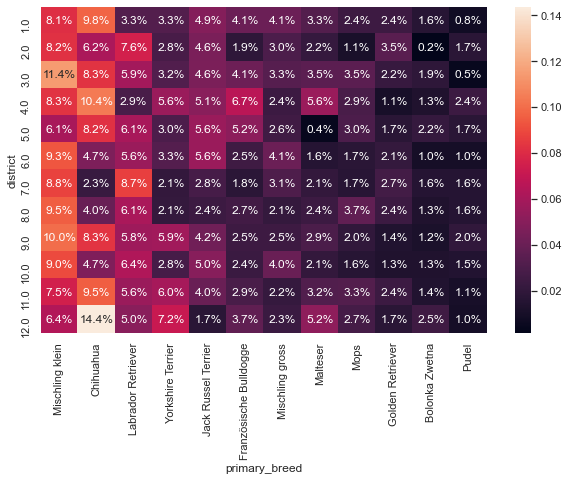

In [101]:
#data_heatmap = data_plot.drop(columns=['sum'])
plt.figure(figsize=(10,6)) 
sns.heatmap(data_heatmap.head(12), annot=True, fmt= '.1%')

<ipython-input-102-dfc420bf96a3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(d1_races_percent.index, rotation=30, fontsize=15)
<ipython-input-102-dfc420bf96a3>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(d2_races_percent.index, rotation=30, fontsize=15)
<ipython-input-102-dfc420bf96a3>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(d3_races_percent.index, rotation=30, fontsize=15)
<ipython-input-102-dfc420bf96a3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(d4_races_percent.index, rotation=30, fontsize=15)
<ipython-input-102-dfc420bf96a3>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(d5_races_percent.index, rotation=30, fontsize=15)
<ipython-input-102-dfc420bf96a3>:45: UserWarning: FixedFormatter should only be 

[Text(0, 0, 'Chihuahua'),
 Text(1, 0, 'Yorkshire Terrier'),
 Text(2, 0, 'Mischling klein'),
 Text(3, 0, 'Malteser'),
 Text(4, 0, 'Labrador Retriever')]

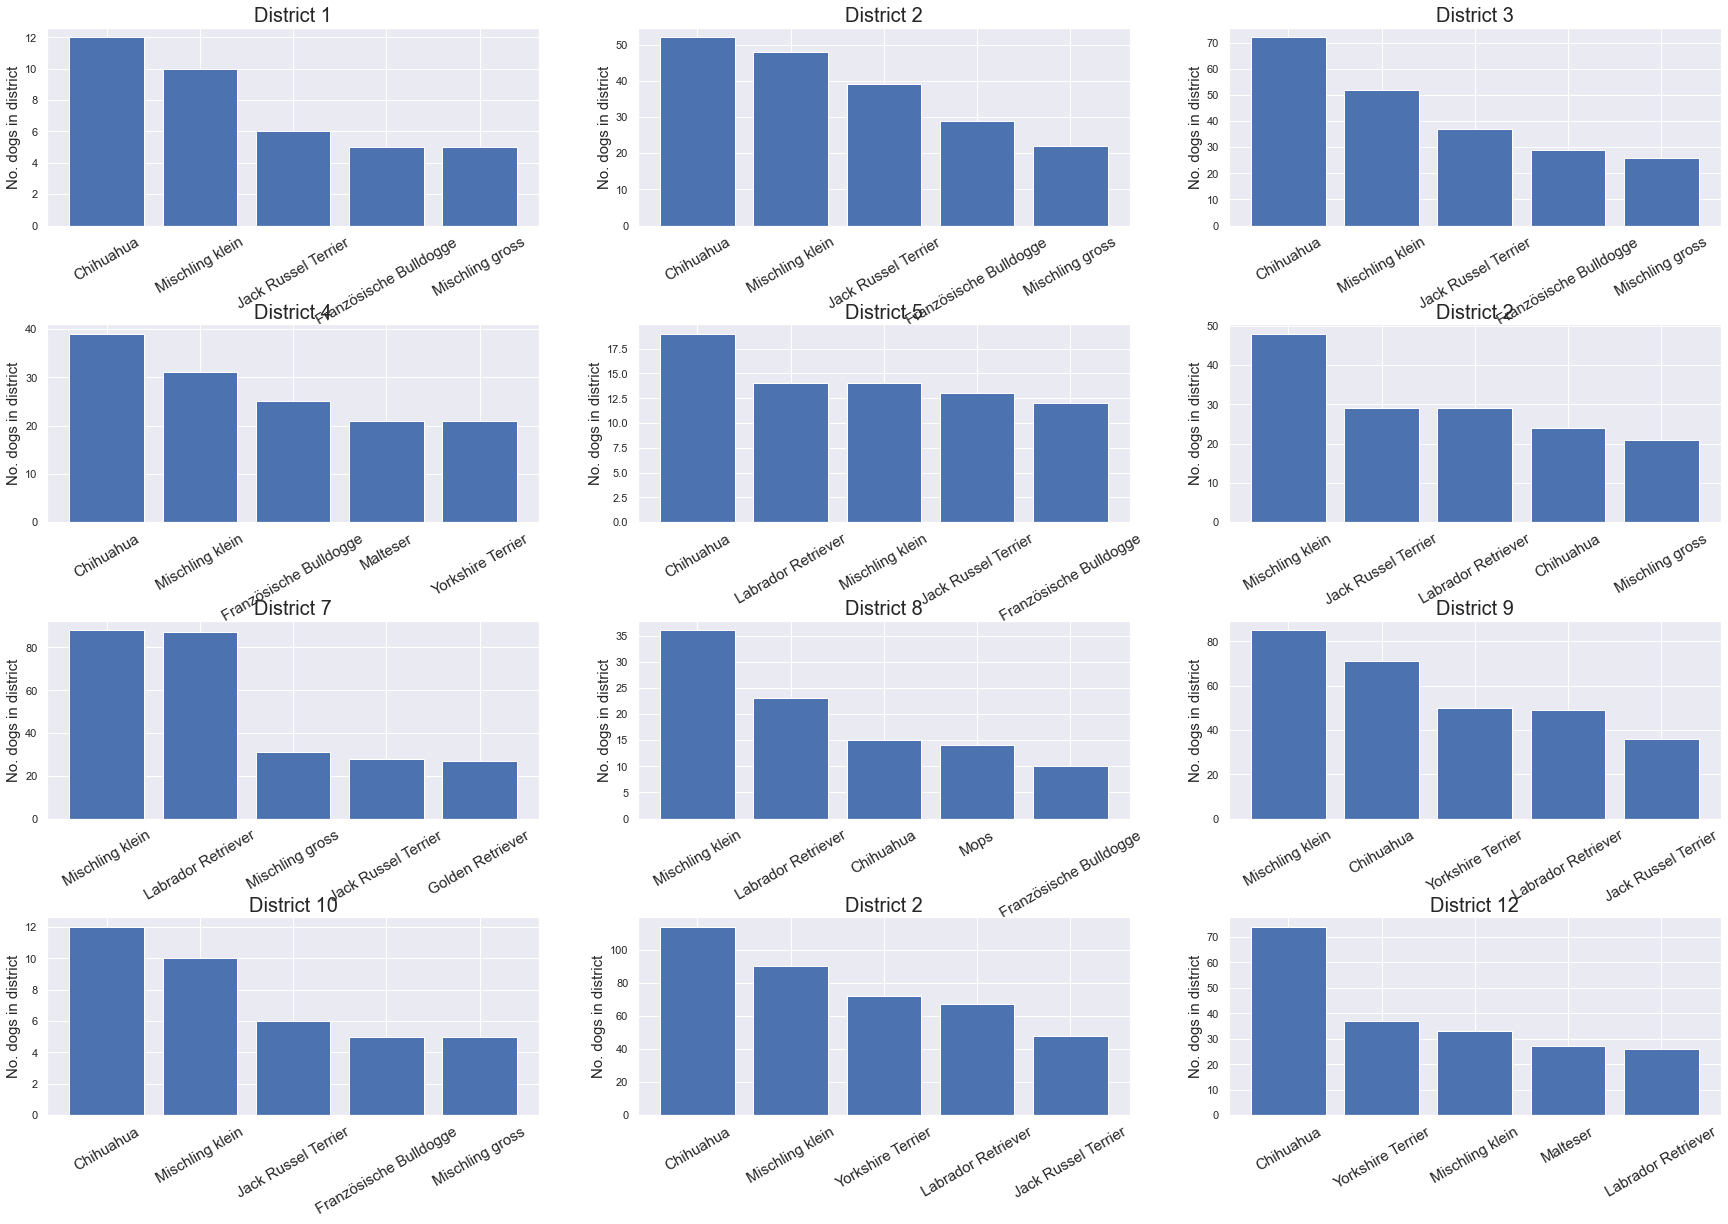

In [102]:
#most popular breeds in perecnt of dogs by district (Kreis)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=4, ncols=3, figsize=(30,20))
plt.subplots_adjust(hspace=0.5)

# district 1 plot
d1_races = district_1['primary_breed'].value_counts().head(5)
ax1.bar(d1_races.index , d1_races)
ax1.set_title('District 1', fontsize=20)
ax1.set_ylabel('No. dogs in district', fontsize=15)
ax1.set_xticklabels(d1_races_percent.index, rotation=30, fontsize=15)

# district 2 plot
d2_races = district_2['primary_breed'].value_counts().head(5)
ax2.bar(d2_races.index , d2_races)
ax2.set_title('District 2', fontsize=20)
ax2.set_ylabel('No. dogs in district', fontsize=15)
ax2.set_xticklabels(d2_races_percent.index, rotation=30, fontsize=15)

# district 3 plot
d3_races = district_3['primary_breed'].value_counts().head(5)
ax3.bar(d3_races.index , d3_races)
ax3.set_title('District 3', fontsize=20)
ax3.set_ylabel('No. dogs in district', fontsize=15)
ax3.set_xticklabels(d3_races_percent.index, rotation=30, fontsize=15)

# district 4 plot
d4_races = district_4['primary_breed'].value_counts().head(5)
ax4.bar(d4_races.index , d4_races)
ax4.set_title('District 4', fontsize=20)
ax4.set_ylabel('No. dogs in district', fontsize=15)
ax4.set_xticklabels(d4_races_percent.index, rotation=30, fontsize=15)

# district 5 plot
d5_races = district_5['primary_breed'].value_counts().head(5)
ax5.bar(d5_races.index , d5_races)
ax5.set_title('District 5', fontsize=20)
ax5.set_ylabel('No. dogs in district', fontsize=15)
ax5.set_xticklabels(d5_races_percent.index, rotation=30, fontsize=15)

# district 6 plot
d6_races = district_6['primary_breed'].value_counts().head(5)
ax6.bar(d6_races.index , d6_races)
ax6.set_title('District 2', fontsize=20)
ax6.set_ylabel('No. dogs in district', fontsize=15)
ax6.set_xticklabels(d6_races_percent.index, rotation=30, fontsize=15)

# district 7 plot
d7_races = district_7['primary_breed'].value_counts().head(5)
ax7.bar(d7_races.index , d7_races)
ax7.set_title('District 7', fontsize=20)
ax7.set_ylabel('No. dogs in district', fontsize=15)
ax7.set_xticklabels(d7_races_percent.index, rotation=30, fontsize=15)

# district 8 plot
d8_races = district_8['primary_breed'].value_counts().head(5)
ax8.bar(d8_races.index , d8_races)
ax8.set_title('District 8', fontsize=20)
ax8.set_ylabel('No. dogs in district', fontsize=15)
ax8.set_xticklabels(d8_races_percent.index, rotation=30, fontsize=15)

# district 9 plot
d9_races = district_9['primary_breed'].value_counts().head(5)
ax9.bar(d9_races.index , d9_races)
ax9.set_title('District 9', fontsize=20)
ax9.set_ylabel('No. dogs in district', fontsize=15)
ax9.set_xticklabels(d9_races_percent.index, rotation=30, fontsize=15)

# district 10 plot
d10_races = district_10['primary_breed'].value_counts().head(5)
ax10.bar(d10_races.index , d10_races)
ax10.set_title('District 10', fontsize=20)
ax10.set_ylabel('No. dogs in district', fontsize=15)
ax10.set_xticklabels(d10_races_percent.index, rotation=30, fontsize=15)

# district 11 plot
d11_races = district_11['primary_breed'].value_counts().head(5)
ax11.bar(d11_races.index , d11_races)
ax11.set_title('District 2', fontsize=20)
ax11.set_ylabel('No. dogs in district', fontsize=15)
ax11.set_xticklabels(d11_races_percent.index, rotation=30, fontsize=15)

# district 12 plot
d12_races = district_12['primary_breed'].value_counts().head(5)
ax12.bar(d12_races.index , d12_races)
ax12.set_title('District 12', fontsize=20)
ax12.set_ylabel('No. dogs in district', fontsize=15)
ax12.set_xticklabels(d12_races_percent.index, rotation=30, fontsize=15)

In [103]:
#number of dogs within each district
data.groupby(by='district').size().sort_values()

district
1.0      123
5.0      231
4.0      375
8.0      377
6.0      515
12.0     515
3.0      629
2.0      633
10.0     676
9.0      851
7.0     1003
11.0    1194
dtype: int64

In [104]:
#analysis number of dogs per owner
data.groupby(by='id').size().sort_values().describe()

count    6446.000000
mean        1.104871
std         0.418929
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
dtype: float64

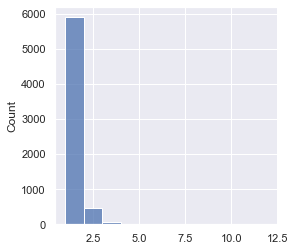

In [105]:
#Distribution of number of dogs by individual owner
plt.figure(figsize=(4,4))

_=sns.histplot(data.groupby(by='id').size().sort_values(), binrange = (1, 12), binwidth = 1)

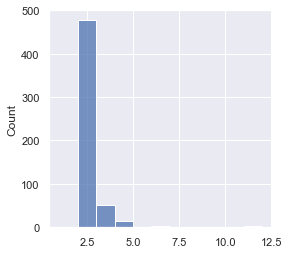

In [106]:
#Distribution of individual owner with more than 2 dogs
plt.figure(figsize=(4,4)) 
histdata=data.groupby(by='id').size().sort_values()
histdata=histdata[histdata>1]
_=sns.histplot(histdata, binrange = (1, 12), binwidth = 1, )

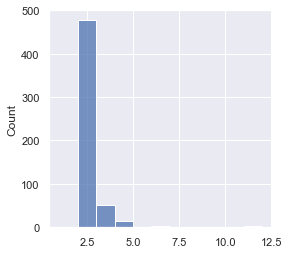

In [107]:
#Distribution of individual owner with more than 1 dogs
plt.figure(figsize=(4,4)) 
histdata=data.groupby(by='id').size().sort_values()
histdata=histdata[histdata>1]
_=sns.histplot(histdata, binrange = (1, 12), binwidth = 1, )

In [108]:
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
histdata.value_counts(bins=bins)

(0.999, 2.0]    477
(2.0, 3.0]       52
(3.0, 4.0]       14
(5.0, 6.0]        3
(10.0, 11.0]      2
(8.0, 9.0]        1
(6.0, 7.0]        1
(4.0, 5.0]        1
(11.0, 12.0]      0
(9.0, 10.0]       0
(7.0, 8.0]        0
dtype: int64

Text(0.5, 1.0, 'Popular Breeds Through time')

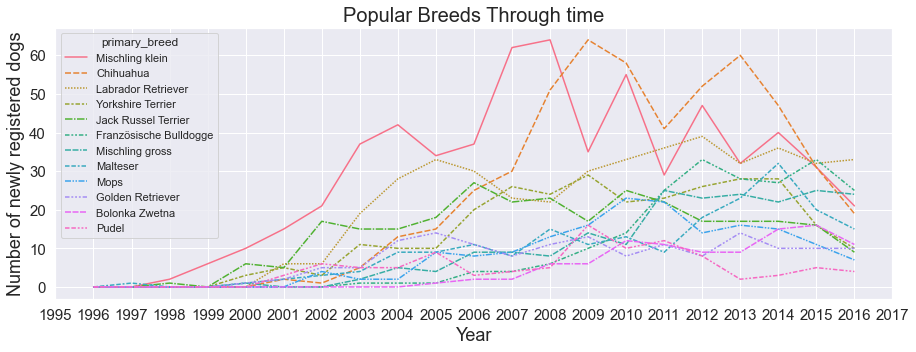

In [109]:
#popularity of breeds through time
data_plot = data[['primary_breed','dog_dob']].set_index('dog_dob')

lines = data_plot.groupby(['dog_dob','primary_breed']).size().unstack()
lines[np.isnan(lines)] = 0

pop_breed = lines[['Mischling klein', 'Chihuahua', 'Labrador Retriever','Yorkshire Terrier', 'Jack Russel Terrier','Französische Bulldogge', 'Mischling gross', 'Malteser', 'Mops','Golden Retriever', 'Bolonka Zwetna', 'Pudel']]
plt.figure(figsize=(15,5))
sns.lineplot(data=pop_breed),
plt.xticks(np.arange(1995, 2018, step=1), fontsize=15)
plt.yticks(np.arange(0, 70, step=10), fontsize=15)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number of newly registered dogs', fontsize=18)
plt.title('Popular Breeds Through time', fontsize=20)


Text(0.5, 1.0, 'Popular Breeds Through time')

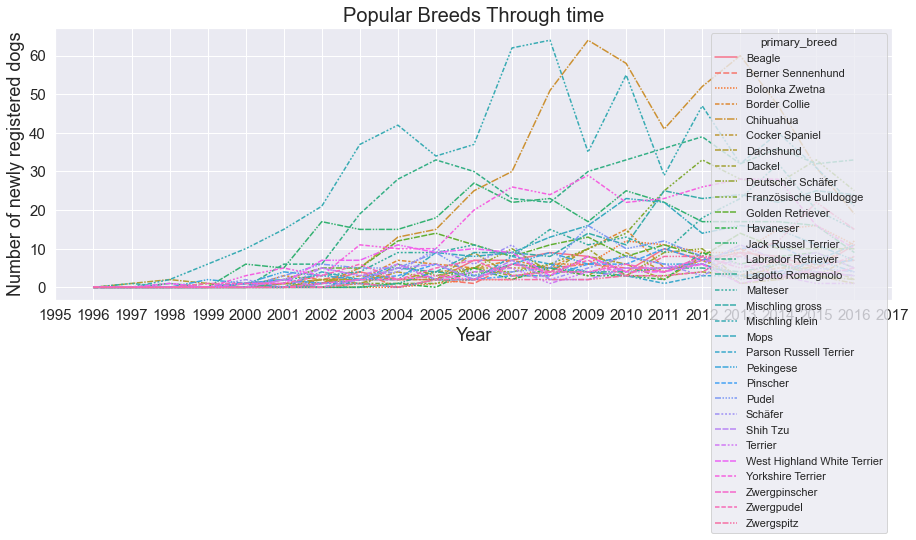

In [110]:
#popularity of breeds through time
data_plot = data[['primary_breed','dog_dob']].set_index('dog_dob')

lines = data_plot.groupby(['dog_dob','primary_breed']).size().unstack()
lines[np.isnan(lines)] = 0

pop_breed = lines[age_filter]
plt.figure(figsize=(15,5))
sns.lineplot(data=pop_breed)
plt.xticks(np.arange(1995, 2018, step=1), fontsize=15)
plt.yticks(np.arange(0, 70, step=10), fontsize=15)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number of newly registered dogs', fontsize=18)
plt.title('Popular Breeds Through time', fontsize=20)